In [1]:
# For nn training
import tensorflow 
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

# For data preprocess
from datetime import date, datetime
import numpy as np
import csv
import os

import pandas as pd

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

%matplotlib inline
from tensorflow.keras import callbacks

In [2]:
root_dir = "../input/machine-learningntut-2021-autumn-regression/ntut-ml-regression-2021"
train_dir = root_dir + "/train-v3.csv"
valid_dir = root_dir + "/valid-v3.csv"
test_dir = root_dir + "/test-v3.csv"

## 資料預處理
嘗試將train valid 兩組資料合併，處理完之後在打散

In [3]:
# load dataset to dataframe
train_df = pd.read_csv(train_dir)
valid_df = pd.read_csv(valid_dir)
test_df = pd.read_csv(test_dir)
train_df

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,9253900354,580000,2014,7,1,3,2.50,2200,11000,2,...,9,2200,0,1978,0,98008,47.5916,-122.112,2200,12851
12963,9510300130,598000,2014,6,28,4,2.50,3130,40918,2,...,9,3130,0,1994,0,98045,47.4761,-121.723,2760,35440
12964,1105000373,252500,2015,5,6,2,1.50,1110,986,2,...,7,950,160,2009,0,98118,47.5427,-122.272,1110,3515
12965,3629990280,497000,2014,6,23,3,2.25,1630,3817,2,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348


In [4]:
merge_df = train_df.append(valid_df, ignore_index=True)
merge_df

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15123,6421100342,733000,2014,8,11,3,2.50,2160,9888,2,...,9,2160,0,1989,0,98052,47.6712,-122.142,3060,7829
15124,4254000220,475000,2015,3,7,4,2.50,2040,16200,2,...,8,2040,0,1997,0,98019,47.7366,-121.958,2530,15389
15125,8944310330,375000,2014,8,19,3,2.50,1520,5649,2,...,7,1520,0,1989,0,98034,47.7221,-122.162,1540,5000
15126,7215400770,260000,2014,6,23,4,2.50,2000,37045,2,...,8,2000,0,1989,0,98042,47.3398,-122.071,2390,36868


In [5]:
# train_df['date'] = train_df['sale_yr'].astype(str) + "/" + train_df['sale_month'].astype(str) + "/" +  train_df['sale_day'].astype(str)
# train_df['date'] = pd.to_datetime(train_df['date'])
# train_df['date'] = train_df.date.values.astype(np.int64) // 10 ** 9
# train_df

In [6]:
cols = [
    "id",
    "sale_yr", 
    "sale_month",
    "sale_day",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "zipcode",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
    "price"
]
# scatterplotmatrix(merge_df[cols].values.astype(float), figsize=(50,50), names=cols, alpha=0.5)
# plt.tight_layout()
# plt.show()

In [7]:
print(merge_df.corr().sort_values(by=['price'])['price'])

# remove extreme rows
merge_df = merge_df[merge_df['bedrooms'] < 30]
# merge_df = merge_df[merge_df['sqft_living'] < 12000]
# merge_df = merge_df[merge_df['sqft_lot15'] < 800000]
merge_df = merge_df[merge_df['bathrooms'] != 0]
merge_df = merge_df[merge_df['bedrooms'] != 0]

# Replace 'yr_built' with 'yr_renovated' where is not equal 0
merge_df.loc[merge_df['yr_renovated'] != 0, 'yr_built'] = merge_df['yr_renovated']
test_df.loc[test_df['yr_renovated'] != 0, 'yr_built'] = test_df['yr_renovated']

# valid_df.corr().sort_values(by=['price'])['price']
print(merge_df.corr().sort_values(by=['price'])['price'])

drop_cols = ['id', 'sale_month', 'sale_day', 'zipcode', 'condition', 'yr_renovated']
input_dim = len(cols) - (len(drop_cols) + 1)
merge_df = merge_df.drop(drop_cols, axis=1)

zipcode         -0.051056
sale_month      -0.023457
id              -0.016893
sale_day        -0.011428
sale_yr          0.008044
long             0.021472
condition        0.033654
yr_built         0.059349
sqft_lot15       0.079869
sqft_lot         0.101017
yr_renovated     0.126295
floors           0.236195
waterfront       0.270146
bedrooms         0.301306
lat              0.309061
sqft_basement    0.326485
view             0.401936
bathrooms        0.521275
sqft_living15    0.586500
sqft_above       0.602456
grade            0.671454
sqft_living      0.699196
price            1.000000
Name: price, dtype: float64
zipcode         -0.051448
sale_month      -0.023300
id              -0.016864
sale_day        -0.011429
sale_yr          0.008282
long             0.022175
condition        0.033319
sqft_lot15       0.079913
sqft_lot         0.101063
yr_built         0.108990
yr_renovated     0.126303
floors           0.236165
waterfront       0.270247
lat              0.308732
bedrooms  

## Split train data

In [8]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(merge_df, test_size=0.2, random_state=103)
# train data
x_train = train.drop(['price'], axis=1)
y_train = train['price'].values

# valid data
x_valid = valid.drop(['price'], axis=1)
y_valid = valid['price'].values

# test data
x_test = test_df.drop(drop_cols, axis=1)
train_df

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,9253900354,580000,2014,7,1,3,2.50,2200,11000,2,...,9,2200,0,1978,0,98008,47.5916,-122.112,2200,12851
12963,9510300130,598000,2014,6,28,4,2.50,3130,40918,2,...,9,3130,0,1994,0,98045,47.4761,-121.723,2760,35440
12964,1105000373,252500,2015,5,6,2,1.50,1110,986,2,...,7,950,160,2009,0,98118,47.5427,-122.272,1110,3515
12965,3629990280,497000,2014,6,23,3,2.25,1630,3817,2,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348


In [9]:
mean = x_train.mean()
std = x_train.std()
print(mean)
print(std)
x_train = (x_train-mean) / std
x_valid = (x_valid-mean) / std
x_test = (x_test-mean) / std

sale_yr           2014.325339
bedrooms             3.362719
bathrooms            2.108584
sqft_living       2070.657046
sqft_lot         15003.731310
floors               1.442441
waterfront           0.008353
view                 0.237430
grade                7.643318
sqft_above        1778.521750
sqft_basement      292.135296
yr_built          1973.217416
lat                 47.559004
long              -122.214662
sqft_living15     1979.337661
sqft_lot15       12778.318558
dtype: float64
sale_yr              0.468521
bedrooms             0.904373
bathrooms            0.764688
sqft_living        916.359562
sqft_lot         38789.001499
floors               0.553105
waterfront           0.091014
view                 0.775063
grade                1.162528
sqft_above         825.482940
sqft_basement      441.769529
yr_built            28.813426
lat                  0.139489
long                 0.141679
sqft_living15      682.997493
sqft_lot15       27353.273168
dtype: float64


## Training model

In [10]:
init_weight = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=57)

model = Sequential()
model.add(Dense(64, input_dim=input_dim, kernel_initializer=init_weight, activation='relu'))
# model.add(Dense(64, kernel_initializer=init_weight, activation='relu'))
model.add(Dense(64, kernel_initializer=init_weight, activation='relu'))
model.add(Dense(64, kernel_initializer=init_weight, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(64, kernel_initializer=init_weight, activation='relu'))
model.add(Dense(32, kernel_initializer=init_weight, activation='relu'))
model.add(Dense(32, kernel_initializer=init_weight, activation='relu'))
model.add(Dense(1))

opt = Adam(learning_rate=0.02)
# opt = SGD( decay=1e-8, momentum=0.9)
model.compile(loss='MAE', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
es = callbacks.EarlyStopping(patience=50, monitor='val_loss', mode='auto')
check_point = callbacks.ModelCheckpoint(
    'model.h5',
    monitor='val_loss',
    verbose=3,
    save_best_only=True,
    save_weight_only=True,
    mode='auto',
    period=1
)
my_callbacks = [es, check_point]

In [12]:
batch_size = 32
epochs = 1000
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_valid, y_valid),
    callbacks=my_callbacks
)

2021-11-17 10:16:34.352353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
378/378 [==============================] - 2s 4ms/step - loss: 148151.4062 - val_loss: 111953.6250

Epoch 00001: val_loss improved from inf to 111953.62500, saving model to model.h5
Epoch 2/1000
378/378 [==============================] - 1s 3ms/step - loss: 114784.2891 - val_loss: 109915.7031

Epoch 00002: val_loss improved from 111953.62500 to 109915.70312, saving model to model.h5
Epoch 3/1000
378/378 [==============================] - 1s 3ms/step - loss: 114145.2188 - val_loss: 108686.2500

Epoch 00003: val_loss improved from 109915.70312 to 108686.25000, saving model to model.h5
Epoch 4/1000
378/378 [==============================] - 1s 3ms/step - loss: 113529.3125 - val_loss: 108665.3984

Epoch 00004: val_loss improved from 108686.25000 to 108665.39844, saving model to model.h5
Epoch 5/1000
378/378 [==============================] - 1s 3ms/step - loss: 112624.4844 - val_loss: 107347.5312

Epoch 00005: val_loss improved from 108665.39844 to 107347.53125, saving model t

## Result

<AxesSubplot:>

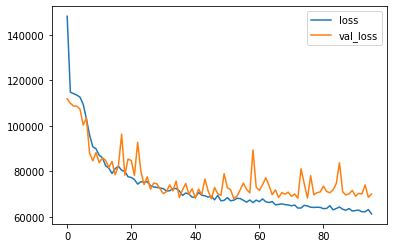

In [13]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Predict

In [14]:
model = keras.models.load_model('model.h5')
predict_price = model.predict(x_test)
predict_price

array([[651355.2 ],
       [708831.94],
       [504983.66],
       ...,
       [315025.72],
       [500909.  ],
       [175797.34]], dtype=float32)

In [15]:
with open("predict_result.csv", "w") as f:
    f.write('id,price\n')
    for i in range(len(predict_price)):
        f.write(f"{i+1},{float(predict_price[i])}\n")

In [16]:
# Download your results!
from IPython.display import FileLink
FileLink('predict_result.csv')

/kaggle/working/predict_result.csv